In [47]:
import pandas as pd
import numpy as np
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import sklearn.tree as tree
import sklearn.model_selection as model_selection
import seaborn as sns
import math

In [32]:
census_data_income = pd.read_csv('adult.csv')

In [33]:
census_data_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


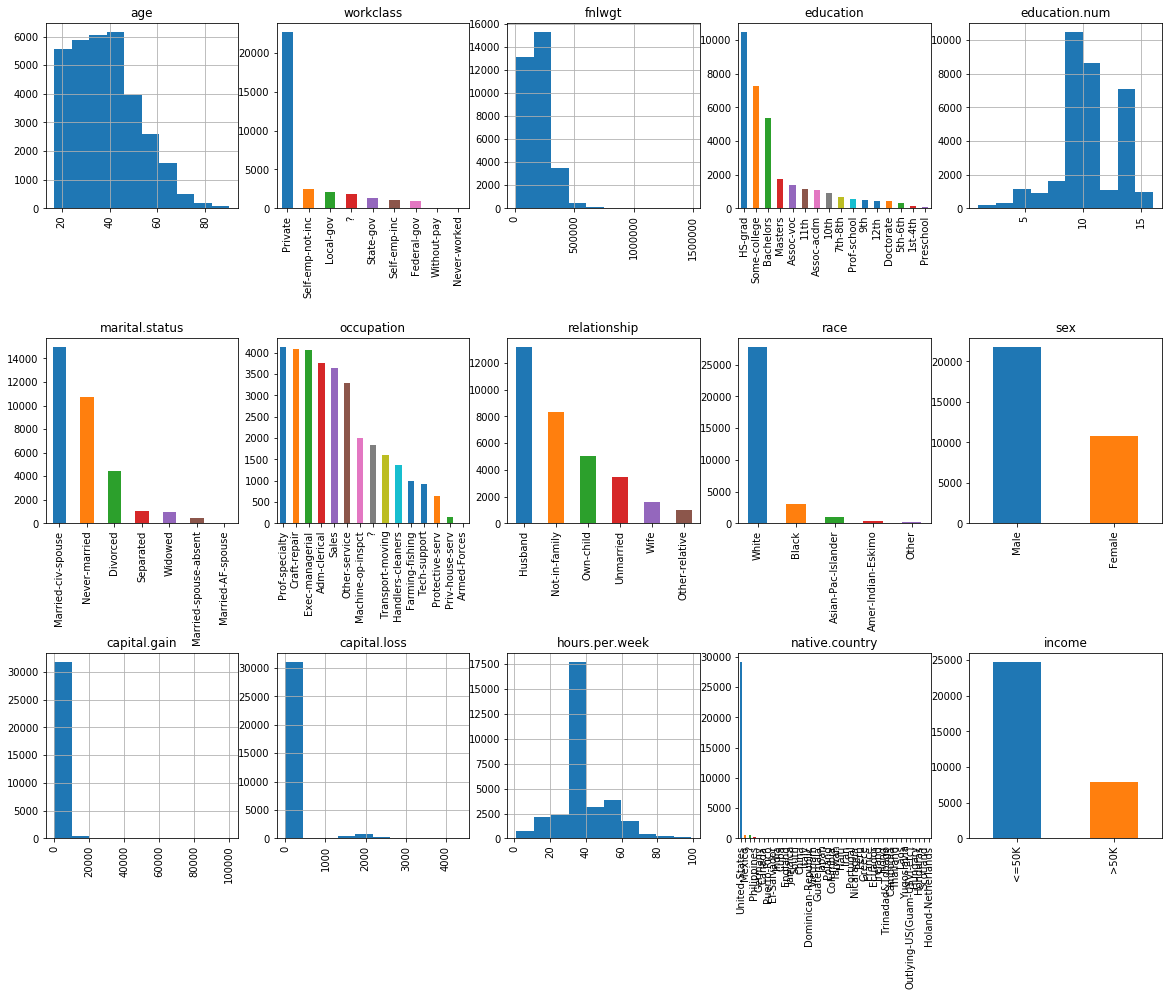

In [34]:
# fuente: https://www.valentinmihov.com/2015/04/17/adult-income-data-set/

fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(census_data_income.shape[1]) / cols)
for i, column in enumerate(census_data_income.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if census_data_income.dtypes[column] == np.object:
        census_data_income[column].value_counts().plot(kind="bar", axes=ax)
    else:
        census_data_income[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [35]:
data = census_data_income
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [36]:
data = data.replace({'workclass':{'?' : 'Private'}})
data = data.replace({'occupation':{'?' : 'Prof-specialty'}})

In [37]:
data = data.drop('education',1)
data.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [39]:
data_d = pd.get_dummies(data)
data_d.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,4356,18,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,4356,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


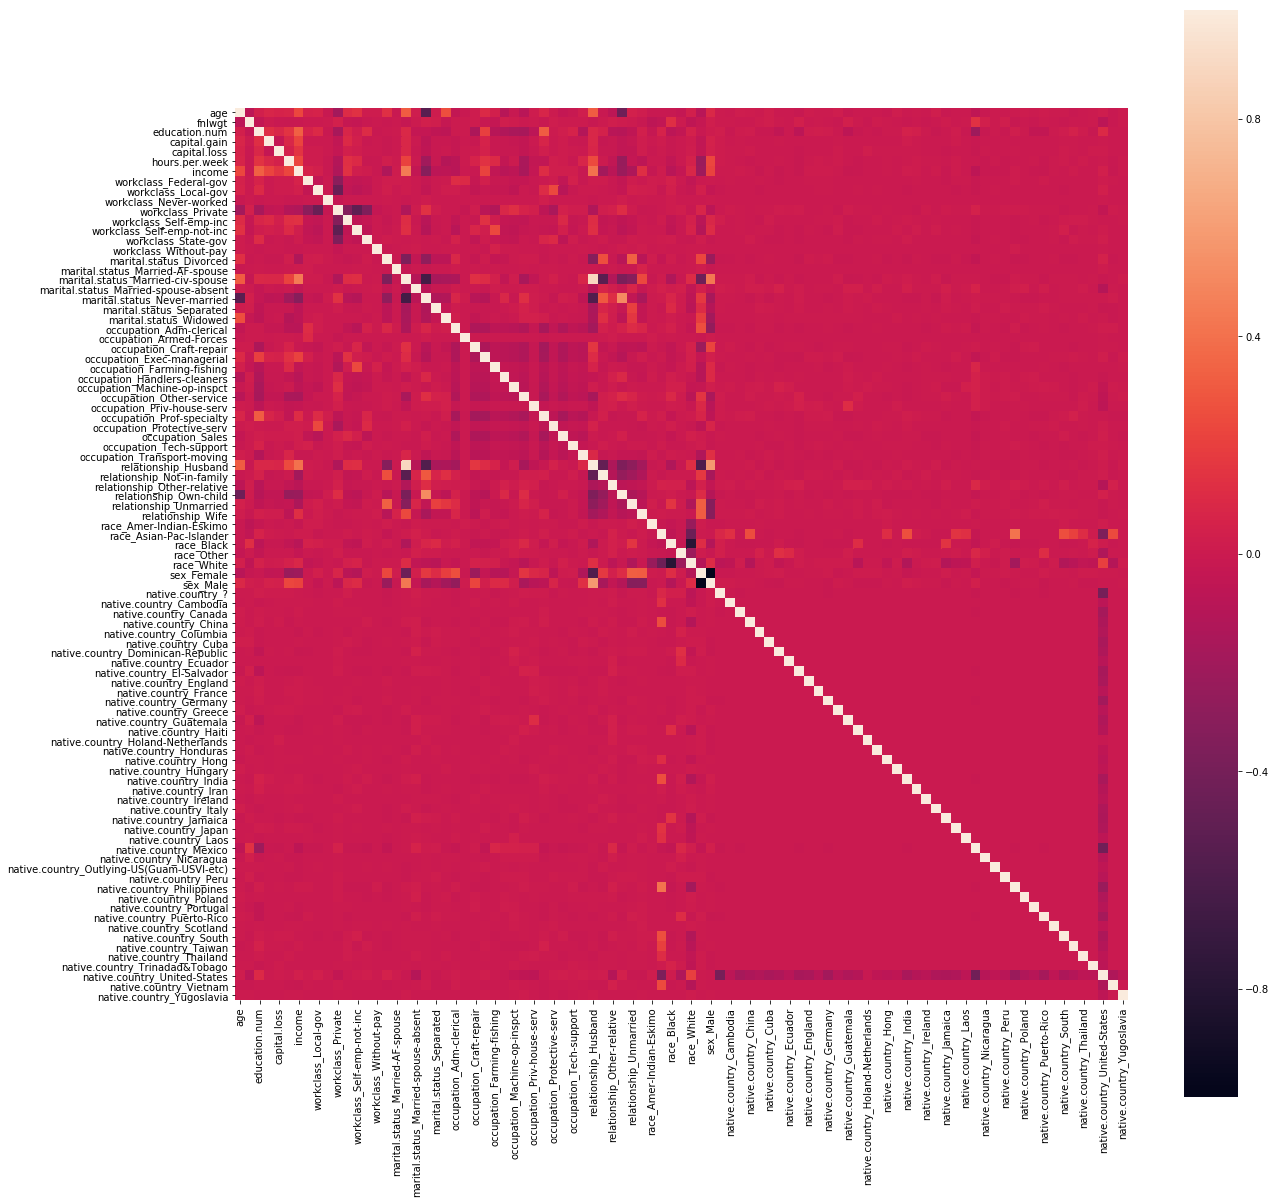

In [40]:
# fuente: https://www.valentinmihov.com/2015/04/17/adult-income-data-set/
plt.subplots(figsize=(20,20))
sns.heatmap(data_d.corr(), square=True)
plt.show()

In [62]:
from sklearn.model_selection import train_test_split

X = data_d.drop('income',1)
y = data_d['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
from utils import draw_tree
from sklearn.tree import DecisionTreeClassifier

m = DecisionTreeClassifier()
m.fit(X_train, y_train)

#draw_tree(m, X_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
from sklearn.tree import DecisionTreeRegressor

mr = DecisionTreeRegressor(max_depth=10)
mr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

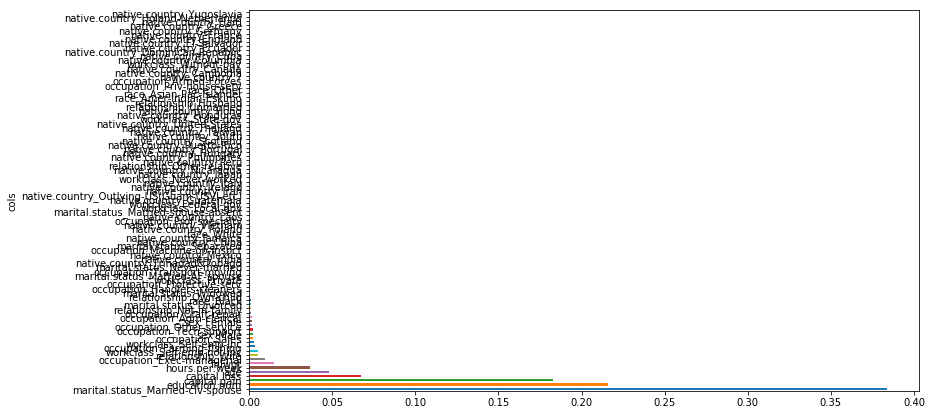

In [85]:
feat_importance = pd.DataFrame({'cols':X.columns, 'imp':mr.feature_importances_}).sort_values('imp', ascending=False)
feat_importance.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False);

In [90]:
m.score(X_test, y_test)
#mr.score(X_test, y_test)

0.8148318747121143

In [93]:
from sklearn.linear_model import LogisticRegression
ml = LogisticRegression()
ml.fit(X_train, y_train)
ml.score(X_test, y_test)

0.801320436050975